# Predictive Analysis & Recommendations

### Practice

In [160]:
import pandas as pd
ratings = pd.read_csv("ml-100k/u.data", sep = '\t', names =["user_id", "item_id", "rating",  "timestamp"])

In [161]:
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [162]:
import numpy as np

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [164]:
print(ratings.isnull().sum())

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64


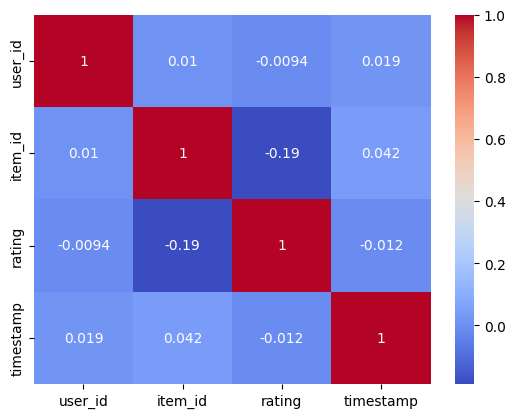

In [165]:
sns.heatmap(ratings.corr(), annot=True, cmap = 'coolwarm')
plt.show()

In [166]:
data = ratings.dropna()


In [167]:
import requests

In [168]:
from bs4 import BeautifulSoup

In [169]:
url = "https://boards.greenhouse.io/taskrabbit"
r = requests.get(url)
soup = BeautifulSoup(r.content, "html.parser")
for job in soup.select(".opening"):
    print(job.text.strip())

In [170]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
# Example: Scraping a directory page (if it exists)
directory_url = "https://boards.greenhouse.io/directory"  # Hypothetical URL
response = requests.get(directory_url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    company_links = soup.find_all('a', href=True)  # Adjust based on the site's structure
    company_urls = [link['href'] for link in company_links if 'boards.greenhouse.io' in link['href']]
    print(company_urls)

## Movie Recommendations

### Data Collection

In [171]:
# importing all required datafrom different files. 
# u.data -> ratings
# u.item -> movie details
# u.user -> user details
ratings = pd.read_csv("ml-100k/u.data", sep ='\t', names =["user_id", "item_id", "ratings", "timestamp"])
movies = pd.read_csv("ml-100k/u.item", sep='|', encoding='latin-1', header=None,
                     names=["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
                            "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
                            "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
                            "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"])

users = pd.read_csv("ml-100k/u.user", sep='|', names = ["user_id", "age", "gender", "occupation", "zipcode"])

In [172]:
# merging all the data into one dataframe
data = pd.merge(ratings, movies, on="item_id")
data = pd.merge(data, users, on ="user_id")


In [173]:
data.head()

,user_id,item_id,ratings,timestamp,title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zipcode
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,1,0,0,1,0,0,39,F,executive,00000
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,1,0,0,1,1,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,47,M,educator,55113


### Data Cleaning

In [174]:
#dropping unnecessary columns
data.drop(columns=['timestamp', 'zip_code', 'IMDb_URL', 'video_release_date'], inplace=True, errors='ignore')
data.drop(columns=['unknown'])

,user_id,item_id,ratings,title,release_date,Action,Adventure,Animation,Children's,Comedy,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zipcode
0,196,242,3,Kolya (1996),24-Jan-1997,0,0,0,0,1,...,0,0,0,0,0,0,49,M,writer,55105
1,186,302,3,L.A. Confidential (1997),01-Jan-1997,0,0,0,0,0,...,1,0,0,1,0,0,39,F,executive,00000
2,22,377,1,Heavyweights (1994),01-Jan-1994,0,0,0,1,1,...,0,0,0,0,0,0,25,M,writer,40206
3,244,51,2,Legends of the Fall (1994),01-Jan-1994,0,0,0,0,0,...,0,1,0,0,1,1,28,M,technician,80525
4,166,346,1,Jackie Brown (1997),01-Jan-1997,0,0,0,0,0,...,0,0,0,0,0,0,47,M,educator,55113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,"First Wives Club, The (1996)",14-Sep-1996,0,0,0,0,1,...,0,0,0,0,0,0,13,M,student,83702
99996,716,204,5,Back to the Future (1985),01-Jan-1985,0,0,0,0,1,...,0,0,1,0,0,0,36,F,administrator,44265
99997,276,1090,1,Sliver (1993),01-Jan-1993,0,0,0,0,0,...,0,0,0,1,0,0,21,M,student,95064
99998,13,225,2,101 Dalmatians (1996),27-Nov-1996,0,0,0,1,1,...,0,0,0,0,0,0,47,M,educator,29206


In [175]:
# standardizing data types
data.dtypes


user_id          int64
item_id          int64
ratings          int64
title           object
release_date    object
unknown          int64
Action           int64
Adventure        int64
Animation        int64
Children's       int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Fantasy          int64
Film-Noir        int64
Horror           int64
Musical          int64
Mystery          int64
Romance          int64
Sci-Fi           int64
Thriller         int64
War              int64
Western          int64
age              int64
gender          object
occupation      object
zipcode         object
dtype: object

In [176]:
data['ratings'] = data['ratings'].astype(float)

In [177]:
data.dtypes

user_id           int64
item_id           int64
ratings         float64
title            object
release_date     object
unknown           int64
Action            int64
Adventure         int64
Animation         int64
Children's        int64
Comedy            int64
Crime             int64
Documentary       int64
Drama             int64
Fantasy           int64
Film-Noir         int64
Horror            int64
Musical           int64
Mystery           int64
Romance           int64
Sci-Fi            int64
Thriller          int64
War               int64
Western           int64
age               int64
gender           object
occupation       object
zipcode          object
dtype: object

In [178]:
data.duplicated().sum()

np.int64(0)

In [179]:
# One hot coding gender and occupation
data = pd.get_dummies(data, columns=['gender', 'occupation'], drop_first = True)

In [180]:
#Scaling age and ratings
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['age']] = scaler.fit_transform(data[['age']])

In [181]:
data.head()

,user_id,item_id,ratings,title,release_date,unknown,Action,Adventure,Animation,Children's,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,196,242,3.0,Kolya (1996),24-Jan-1997,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1,186,302,3.0,L.A. Confidential (1997),01-Jan-1997,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,22,377,1.0,Heavyweights (1994),01-Jan-1994,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
3,244,51,2.0,Legends of the Fall (1994),01-Jan-1994,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,166,346,1.0,Jackie Brown (1997),01-Jan-1997,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [182]:
data.describe()

,user_id,item_id,ratings,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age
count,100000.00000,100000.000000,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,0.0001,0.255890,0.137530,0.036050,0.071820,0.298320,0.080550,...,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540,-8.874679e-17
std,266.61442,330.798356,1.125674,0.0100,0.436362,0.344408,0.186416,0.258191,0.457523,0.272144,...,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894,1.000005e+00
min,1.00000,1.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,-2.246028e+00
25%,254.00000,175.000000,3.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,-7.757664e-01
50%,447.00000,322.000000,4.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,-2.568504e-01
75%,682.00000,631.000000,4.000000,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,6.080095e-01
max,943.00000,1682.000000,5.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,3.462047e+00


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   item_id                   100000 non-null  int64  
 2   ratings                   100000 non-null  float64
 3   title                     100000 non-null  object 
 4   release_date              99991 non-null   object 
 5   unknown                   100000 non-null  int64  
 6   Action                    100000 non-null  int64  
 7   Adventure                 100000 non-null  int64  
 8   Animation                 100000 non-null  int64  
 9   Children's                100000 non-null  int64  
 10  Comedy                    100000 non-null  int64  
 11  Crime                     100000 non-null  int64  
 12  Documentary               100000 non-null  int64  
 13  Drama                     100000 non-null  in